# Bike Sharing assignment


## Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


## Load the dataset


In [2]:
# Load the dataset
data_path = './day.csv'  # path of the csv file
bike_sharing_data = pd.read_csv(data_path)


## converting season and weathersit to categorical variables

In [3]:
# Convert 'season' and 'weathersit' to categorical variables with meaningful string labels
bike_sharing_data['season'] = bike_sharing_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_sharing_data['weathersit'] = bike_sharing_data['weathersit'].map({
    1: 'clear',
    2: 'mist_cloudy',
    3: 'light_snow_rain'
})


## Dropping unnecessary colums and Extracting Numerical and Caterorical features

In [4]:
# Dropping unnecessary columns
bike_sharing_data_prep = bike_sharing_data.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# Extracting numerical and categorical features for visualization
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'weathersit', 'mnth', 'weekday']
target_variable = ['cnt']


## Plotting

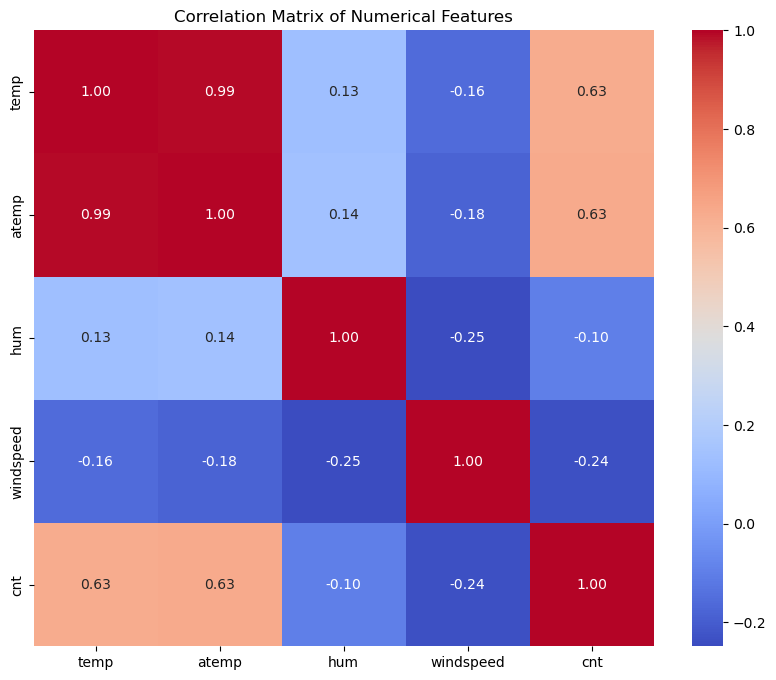

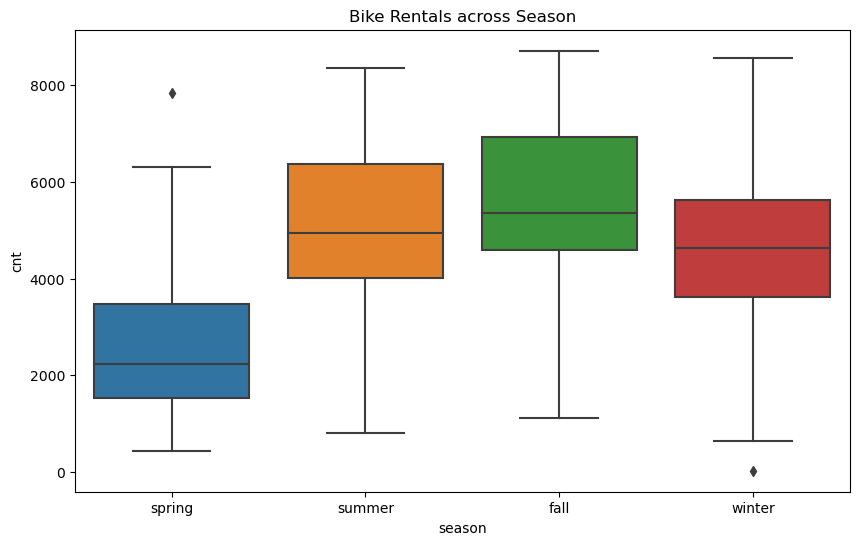

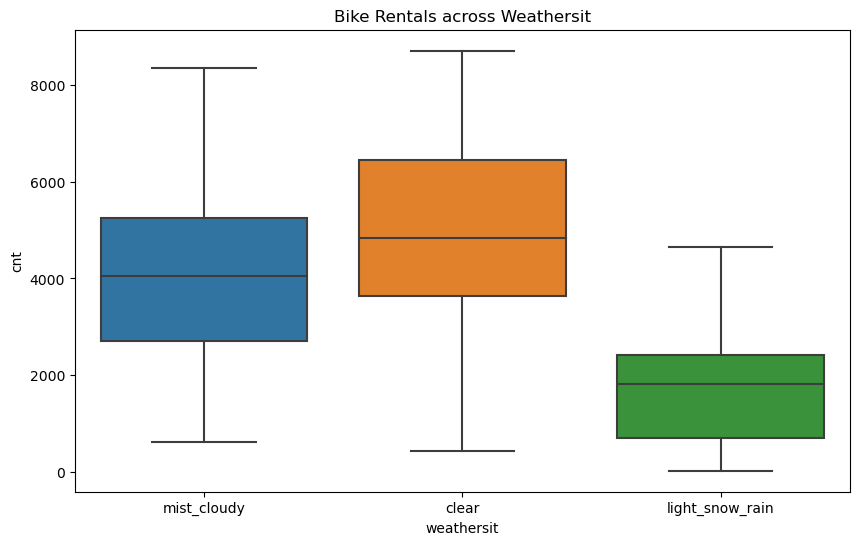

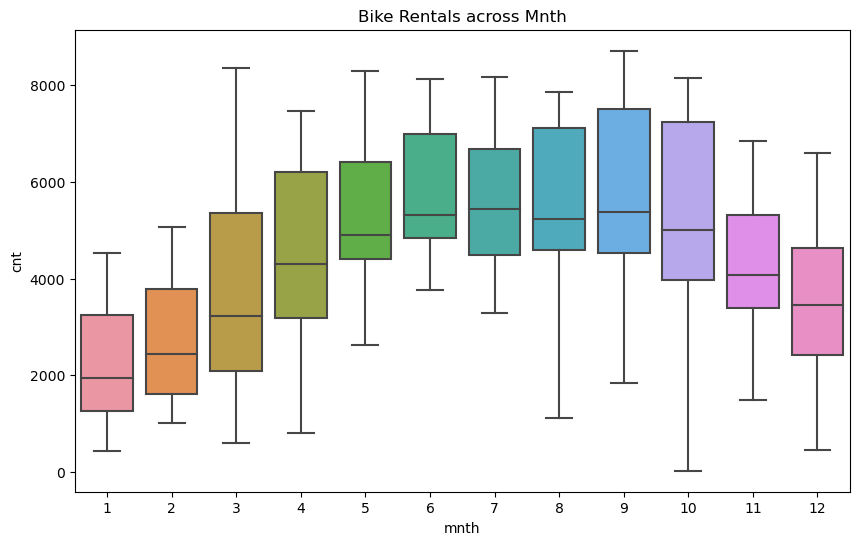

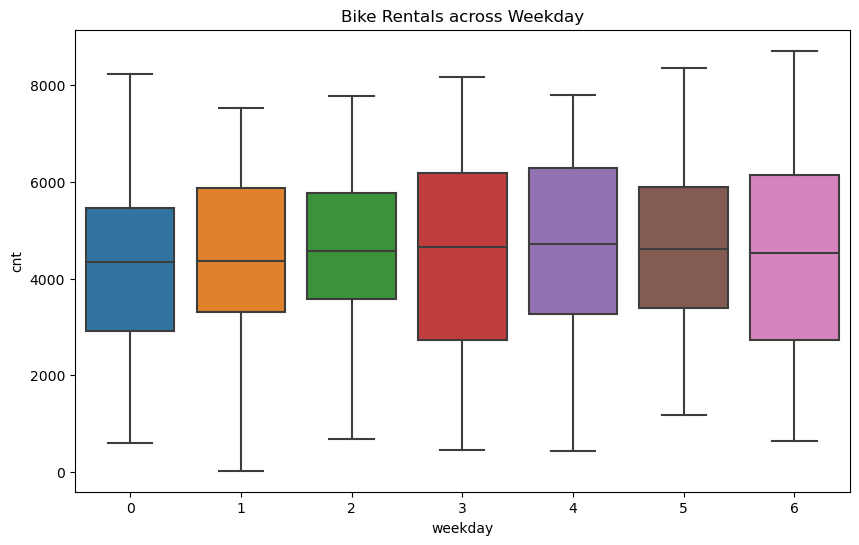

In [5]:
# Plotting Correlation Matrix Heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = bike_sharing_data[numerical_features + target_variable].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Plotting distributions for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='cnt', data=bike_sharing_data)
    plt.title(f'Bike Rentals across {feature.title()}')
    plt.show()



## Linear Regression Processing

In [6]:

# Encoding categorical variables using OneHotEncoder within a ColumnTransformer
one_hot_encoder = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Separating features and target variable for model building
X = bike_sharing_data_prep.drop('cnt', axis=1)
y = bike_sharing_data_prep['cnt']

# Applying encoding
X_encoded = one_hot_encoder.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Building the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Predicting on the test set and calculating R-squared score
y_pred = linear_regression_model.predict(X_test)
r2_score_test = r2_score(y_test, y_pred)

print(f'R-squared score on the test set: {r2_score_test:.4f}')



R-squared score on the test set: 0.8622


## Plotting Residuals

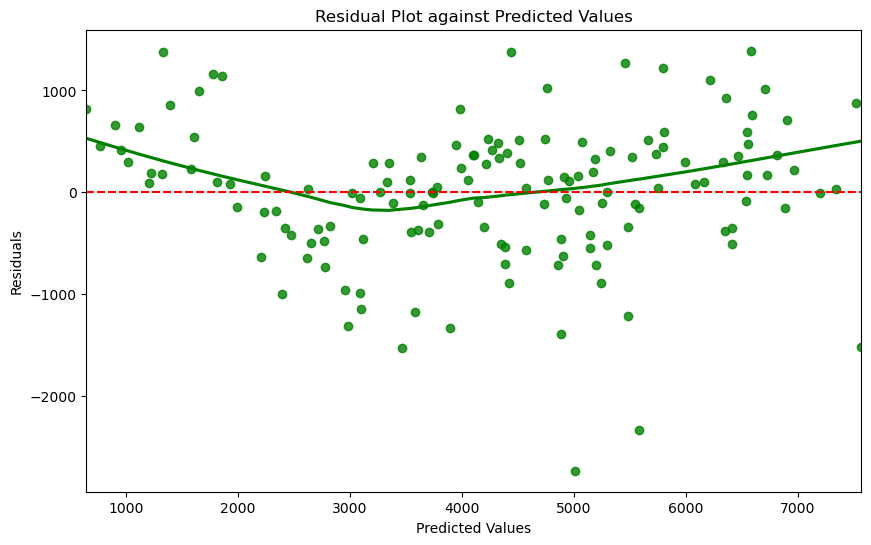

In [7]:
# Plotting Residuals to validate model assumptions
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.title('Residual Plot against Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



## Ploting Rentals across season and accorss weather situation

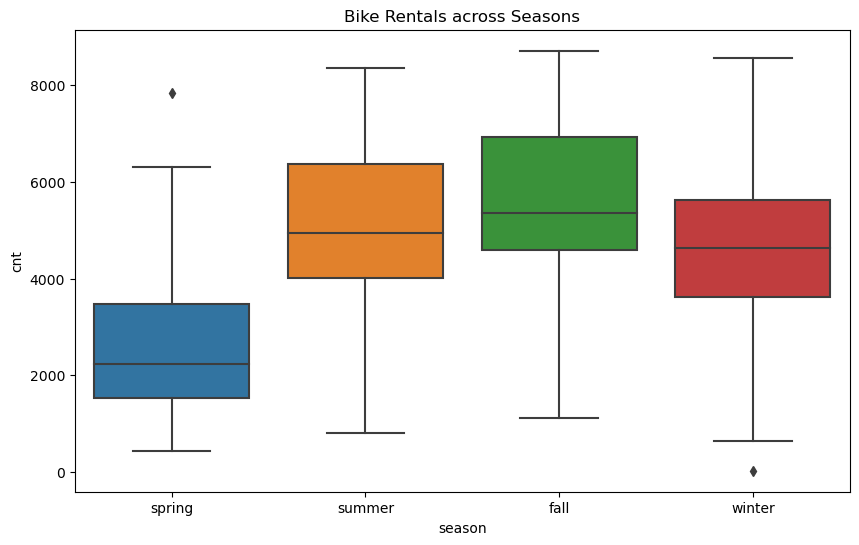

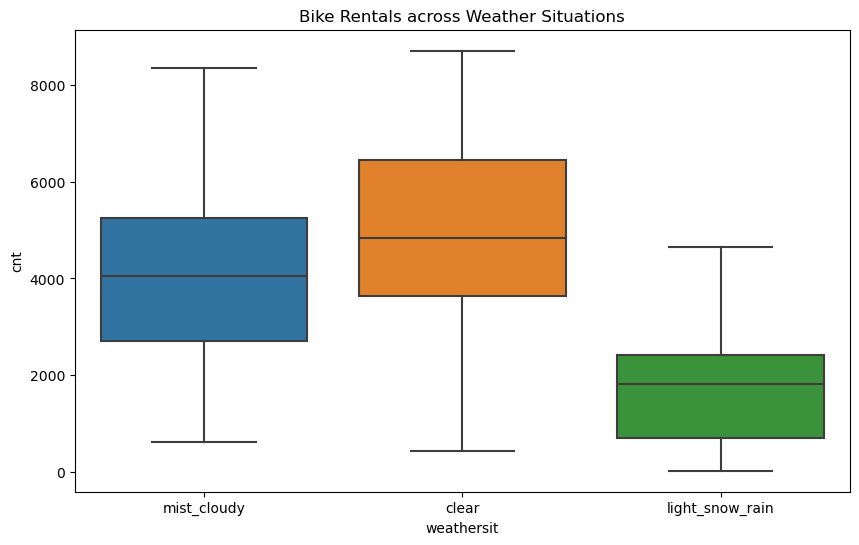

In [8]:
# Boxplot for 'season' and 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=bike_sharing_data)
plt.title('Bike Rentals across Seasons')
plt.show()

# Boxplot for 'weathersit' and 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing_data)
plt.title('Bike Rentals across Weather Situations')
plt.show()


## Generating pair plot of Numarical Variables with Target Variable

C:\pgm_files_anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


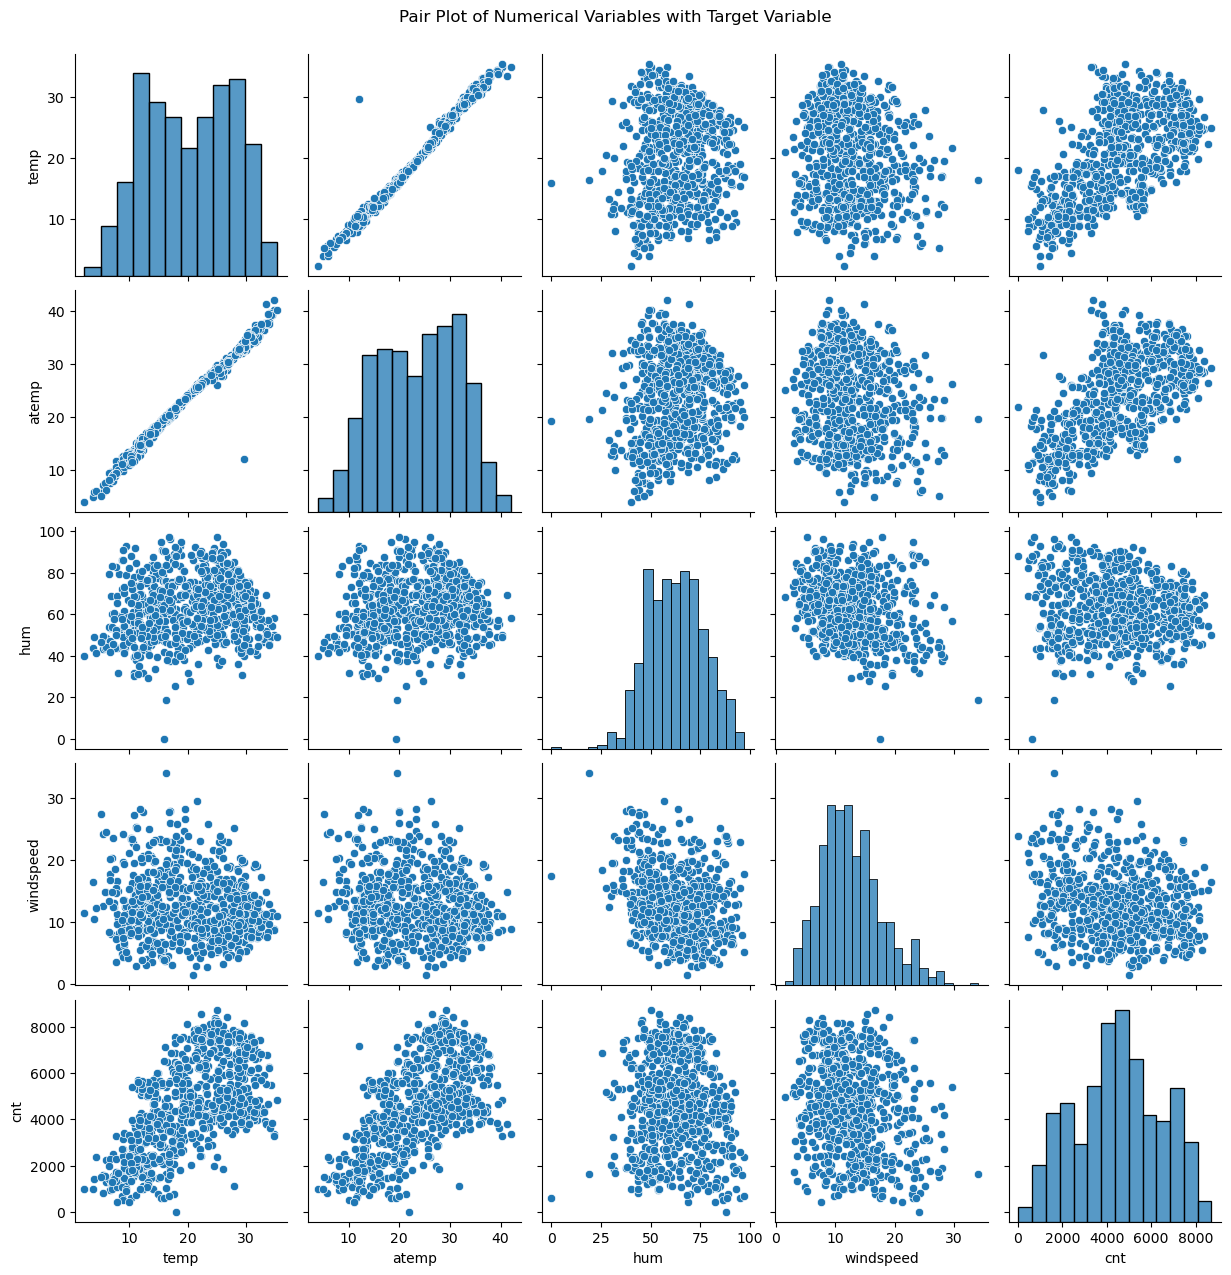

In [9]:
# Selecting only the numerical columns for the pair plot, including the target variable
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
numerical_data = bike_sharing_data[numerical_columns]

# Generating the pair plot
sns.pairplot(numerical_data)
plt.suptitle('Pair Plot of Numerical Variables with Target Variable', y=1.02)  # Adjust title position
plt.show()



## Identifying top 3 features

In [10]:
# Getting the feature names after one-hot encoding
feature_names = one_hot_encoder.get_feature_names_out()

# Adjust the approach to include numerical features in the feature names
# This ensures all_features correctly reflects the full set of model input features
all_features = np.concatenate([feature_names, numerical_features])

# Identifying the top 3 features
# Extracting the coefficients of the linear regression model
coefficients = linear_regression_model.coef_

# Mapping coefficients to their corresponding features
# Ensure the length of all_features matches the number of coefficients
features_coefficients = pd.Series(coefficients, index=feature_names)

# top 3 features
top_3_features = features_coefficients.abs().sort_values(ascending=False).head(3)

print("\nTop 3 Features Contributing to Bike Demand:")
print(top_3_features)


Top 3 Features Contributing to Bike Demand:
one_hot__weathersit_light_snow_rain    2098.815375
remainder__yr                          1970.702648
one_hot__season_spring                  999.726420
dtype: float64
